### 라이브러리

In [36]:
import os
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

path = '/content/drive/MyDrive/lgaimers'
df = pd.read_csv(os.path.join(path,'train.csv'))
df_test = pd.read_csv('/content/drive/MyDrive/lgaimers/test.csv')

### 데이터 확인

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 2881 columns):
 #     Column        Dtype  
---    ------        -----  
 0     PRODUCT_ID    object 
 1     Y_Class       int64  
 2     Y_Quality     float64
 3     TIMESTAMP     object 
 4     LINE          object 
 5     PRODUCT_CODE  object 
 6     X_1           float64
 7     X_2           float64
 8     X_3           float64
 9     X_4           float64
 10    X_5           float64
 11    X_6           float64
 12    X_7           float64
 13    X_8           float64
 14    X_9           float64
 15    X_10          float64
 16    X_11          float64
 17    X_12          float64
 18    X_13          float64
 19    X_14          float64
 20    X_15          float64
 21    X_16          float64
 22    X_17          float64
 23    X_18          float64
 24    X_19          float64
 25    X_20          float64
 26    X_21          float64
 27    X_22          float64
 28    X_23          fl

In [ ]:
df['X_1']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
593     2.0
594     NaN
595     NaN
596    40.0
597    21.0
Name: X_1, Length: 598, dtype: float64

In [ ]:
df['X_500'].isnull().sum()

250

In [ ]:
df['Y_Class'].value_counts()

1    407
2    103
0     88
Name: Y_Class, dtype: int64

In [ ]:
df['PRODUCT_CODE'].value_counts()

T_31    343
A_31    249
O_31      6
Name: PRODUCT_CODE, dtype: int64

In [ ]:
df.isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [ ]:
df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


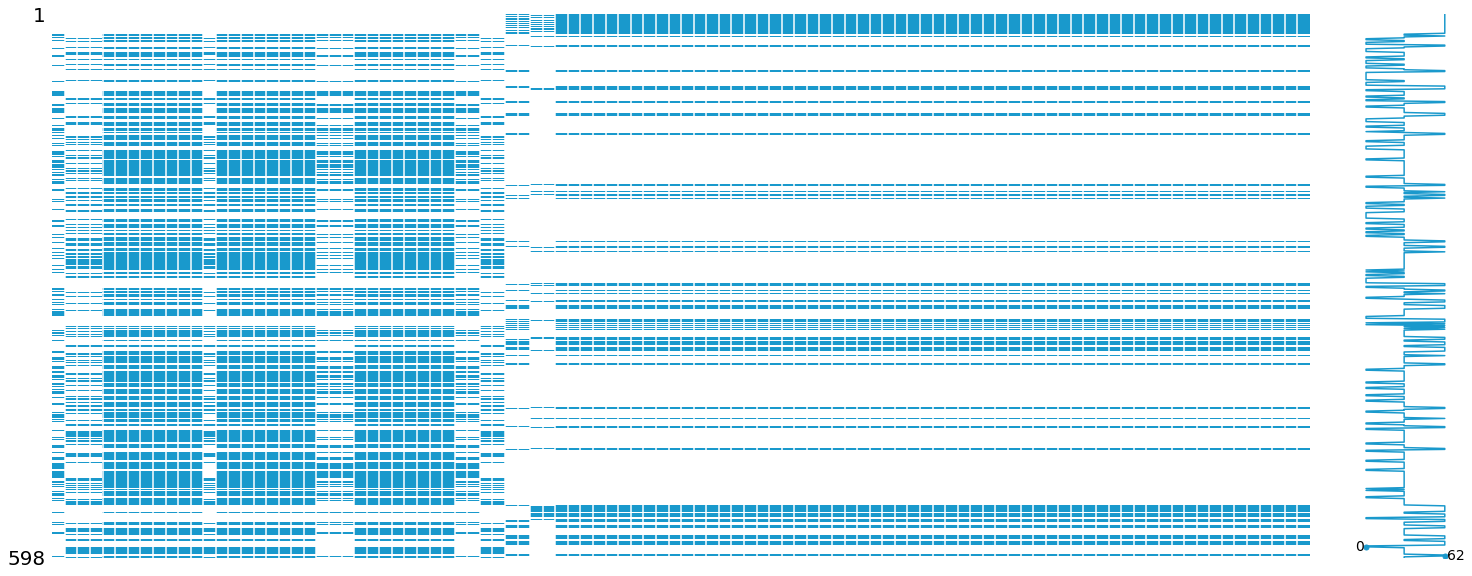

In [ ]:
msno.matrix(df=df.iloc[:, 97:197], color=(0.1, 0.6, 0.8))

### 데이터 가공

In [2]:
df.isnull().sum()

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [3]:
half_null = []
for i in df:
  if df[i].isnull().sum() > 597//1:
    half_null.append(i) 

In [4]:
len(half_null)

82

In [5]:
df = df.drop(half_null,axis=1)
df_test = df_test.drop(half_null,axis=1)

In [6]:
# 0,2 부적합 합친거
x = df.loc[(df['Y_Class']==0) | (df['Y_Class']==2)]
x.groupby(['PRODUCT_CODE','LINE'])['Y_Class'].count()

PRODUCT_CODE  LINE   
A_31          T010305    24
              T010306    33
              T050304    41
              T050307    33
O_31          T100306     2
T_31          T100304    31
              T100306    27
Name: Y_Class, dtype: int64

In [7]:
# 1 적합한거
y = df.loc[df['Y_Class']==1]
y.groupby(['PRODUCT_CODE','LINE'])['Y_Class'].count()

PRODUCT_CODE  LINE   
A_31          T010305     35
              T010306     37
              T050304     37
              T050307      9
O_31          T100304      3
              T100306      1
T_31          T100304    141
              T100306    144
Name: Y_Class, dtype: int64

In [37]:
# def split_data(df):
#   # A_31
#   x_010305 = df.loc[df['LINE']=='T010305']
#   x_010306 = df.loc[df['LINE']=='T010306']
#   x_050304 = df.loc[df['LINE']=='T050304']
#   x_050307 = df.loc[df['LINE']=='T050307']

#   # O_31,T_31
#   x_100304 = df.loc[df['LINE']=='T100304']
#   x_100306 = df.loc[df['LINE']=='T100306']
  
#   return [x_010305,x_010306,x_050304,x_050307,x_100304,x_100306]
def split_data(df):
  A_31 = df.loc[df['PRODUCT_CODE']=='A_31']

  NA_31 = df.loc[df['PRODUCT_CODE']!='A_31']
  return [A_31,NA_31]

In [38]:
result_train = split_data(df) 
result_test = split_data(df_test)

In [39]:
result_test[1]['PRODUCT_CODE'].value_counts()

T_31    239
O_31      4
Name: PRODUCT_CODE, dtype: int64

In [40]:
for idx in range(len(result_train)):
  result_train[idx] = result_train[idx].fillna(result_train[idx].mean())
  result_train[idx] = result_train[idx].fillna(0)
for idx in range(len(result_test)):
  result_test[idx] = result_test[idx].fillna(result_test[idx].mean())
  result_test[idx] = result_test[idx].fillna(0) 

<ipython-input-40-4f2068930710>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result_train[idx] = result_train[idx].fillna(result_train[idx].mean())
<ipython-input-40-4f2068930710>:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  result_test[idx] = result_test[idx].fillna(result_test[idx].mean())


In [42]:
result_test[0]

,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
3,TEST_003,2022-09-09 10:56,T010305,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444
4,TEST_004,2022-09-09 11:04,T010306,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444
5,TEST_005,2022-09-09 19:35,T010306,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444
6,TEST_006,2022-09-09 19:43,T010305,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444
7,TEST_007,2022-09-10 12:27,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,57.740000,52.510000,54.450000,57.990000,63.160000,1.000000,247.988889,251.888889,243.3,228.844444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,TEST_284,2022-11-03 9:53,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,52.970000,58.060000,44.110000,56.330000,62.000000,1.000000,263.400000,257.500000,261.0,236.300000
285,TEST_285,2022-11-03 10:01,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,54.240000,55.550000,51.600000,48.530000,61.950000,1.000000,267.600000,278.600000,271.4,243.300000
286,TEST_286,2022-11-03 11:31,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,58.060000,57.920000,49.060000,48.260000,62.770000,1.000000,199.000000,223.800000,169.7,198.700000
292,TEST_292,2022-11-04 0:31,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,53.550000,52.680000,49.970000,56.660000,63.520000,1.000000,210.500000,214.600000,201.6,191.900000


### 나눴을때 + 전처리

In [134]:
df_train_a = result_train[0]
df_train_na = result_train[1]
df_test_a = result_test[0]
df_test_na = result_test[1]

In [135]:
df_train_a = df_train_a.drop(['TIMESTAMP','Y_Quality'],axis=1)
df_train_na = df_train_na.drop(['TIMESTAMP','Y_Quality'],axis=1)
df_test_a = df_test_a.drop(['TIMESTAMP'],axis=1)
df_test_na = df_test_na.drop(['TIMESTAMP'],axis=1)

In [136]:
product_code = {'A_31':0,'O_31':1,'T_31':2}
line = {'T100304':0,'T100306':1,'T050304':2,'T010306':3,'T010305':4,'T050307':5}

In [137]:
df_train_a['PRODUCT_CODE'] = df_train_a['PRODUCT_CODE'].map(product_code)
df_train_a['LINE'] = df_train_a['LINE'].map(line)

df_train_na['PRODUCT_CODE'] = df_train_na['PRODUCT_CODE'].map(product_code)
df_train_na['LINE'] = df_train_na['LINE'].map(line)

df_test_a['PRODUCT_CODE'] = df_test_a['PRODUCT_CODE'].map(product_code)
df_test_a['LINE'] = df_test_a['LINE'].map(line)

df_test_na['PRODUCT_CODE'] = df_test_na['PRODUCT_CODE'].map(product_code)
df_test_na['LINE'] = df_test_na['LINE'].map(line)

In [141]:
df_test_na

,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
0,TEST_000,1,2,2.0,94.0,0.0,45.0,10.0,0.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,TEST_001,0,2,2.0,93.0,0.0,45.0,11.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,TEST_002,0,2,2.0,95.0,0.0,45.0,11.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,TEST_015,0,2,2.0,102.0,0.0,45.0,11.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,TEST_016,1,2,2.0,93.0,0.0,45.0,10.0,0.0,54.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,TEST_305,1,2,2.0,91.0,0.0,45.0,10.0,0.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
306,TEST_306,0,2,2.0,96.0,0.0,45.0,11.0,0.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
307,TEST_307,1,2,2.0,91.0,0.0,45.0,10.0,0.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
308,TEST_308,1,2,2.0,95.0,0.0,45.0,10.0,0.0,51.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_a = df_train_a.drop(['Y_Class','PRODUCT_ID'],axis=1)
y_train_a = df_train_a['Y_Class']

X_train_na = df_train_na.drop(['Y_Class','PRODUCT_ID'],axis=1)
y_train_na = df_train_na['Y_Class']

X_test_a = df_test_a.drop(['PRODUCT_ID'],axis=1)
X_test_na = df_test_na.drop(['PRODUCT_ID'],axis=1)

In [87]:
sns.barplot(X_train_na['X_5'].value_counts().index,X_train_na['X_5'].value_counts())
plt.xticks(rotation=90)

IndexError: ignored

In [ ]:
X_train_a.columns

Index(['LINE', 'PRODUCT_CODE', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7',
       'X_8',
       ...
       'X_2862', 'X_2863', 'X_2864', 'X_2865', 'X_2866', 'X_2867', 'X_2868',
       'X_2869', 'X_2870', 'X_2871'],
      dtype='object', length=2795)

In [ ]:
X_test_a.describe()

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
count,67.000000,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,67.0,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,3.791045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,169.464179,417.955224,400.537568,382.611940,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359
std,1.161730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.580615,40.204188,38.302204,36.394287,1.920262,3.133387,4.324843,2.417961,1.360564,0.121503
min,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,87.400000,383.000000,361.226415,342.000000,44.410000,41.630000,39.850000,47.820000,60.720000,0.000000
25%,3.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,163.650000,384.000000,368.150943,352.000000,51.810000,53.014706,49.994412,54.202353,63.170000,0.974359
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,172.800000,384.000000,369.574074,353.000000,52.066471,53.014706,49.994412,54.202353,63.806176,1.000000
75%,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,184.000000,466.000000,444.153846,423.000000,52.066471,53.655000,51.175000,55.605000,63.806176,1.000000
max,5.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,206.300000,475.000000,454.924528,433.000000,58.060000,60.490000,60.310000,58.290000,67.240000,1.000000


### 안나누었을때

In [43]:
df_train = pd.concat(result_train,axis=0)

In [44]:
df_test = pd.concat(result_test,axis=0)

In [18]:
print(df_train.shape,df_test.shape)

(598, 2799) (310, 2797)


In [48]:
df_test = df_test.sort_values(by='PRODUCT_ID',ascending=True)

In [50]:
df_test

,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TEST_000,2022-09-09 2:01,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,TEST_001,2022-09-09 2:09,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,TEST_002,2022-09-09 8:42,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,TEST_003,2022-09-09 10:56,T010305,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444
4,TEST_004,2022-09-09 11:04,T010306,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,TEST_305,2022-11-05 11:18,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
306,TEST_306,2022-11-05 16:39,T100304,T_31,2.0,96.0,0.0,45.0,11.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
307,TEST_307,2022-11-05 16:47,T100306,T_31,2.0,91.0,0.0,45.0,10.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
308,TEST_308,2022-11-05 20:53,T100306,T_31,2.0,95.0,0.0,45.0,10.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


### 데이터 전처리

In [51]:
df_train = df_train.drop(['TIMESTAMP','Y_Quality'],axis=1)
df_test = df_test.drop(['TIMESTAMP'],axis=1)

In [52]:
df_train.head()

,PRODUCT_ID,Y_Class,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,39.34,40.89,32.56,34.09,77.77,1.0,0.0,0.0,0.0,0.0
1,TRAIN_001,2,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,38.89,42.82,43.92,35.34,72.55,1.0,0.0,0.0,0.0,0.0
2,TRAIN_002,1,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,39.19,36.65,42.47,36.53,78.35,1.0,0.0,0.0,0.0,0.0
3,TRAIN_003,2,T050307,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,37.74,39.17,52.17,30.58,71.78,1.0,0.0,0.0,0.0,0.0
4,TRAIN_004,1,T050304,A_31,0.0,0.0,0.0,0.0,0.0,0.0,...,38.70,41.89,46.93,33.09,76.97,1.0,0.0,0.0,0.0,0.0


In [53]:
df_test.head()

,PRODUCT_ID,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TEST_000,T100306,T_31,2.0,94.0,0.0,45.0,10.0,0.0,51.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,TEST_001,T100304,T_31,2.0,93.0,0.0,45.0,11.0,0.0,45.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,TEST_002,T100304,T_31,2.0,95.0,0.0,45.0,11.0,0.0,45.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,TEST_003,T010305,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444
4,TEST_004,T010306,A_31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444


In [54]:
product_code = {'A_31':0,'O_31':1,'T_31':2}
line = {'T100304':0,'T100306':1,'T050304':2,'T010306':3,'T010305':4,'T050307':5}

In [55]:
df_train['PRODUCT_CODE'] = df_train['PRODUCT_CODE'].map(product_code)
df_train['LINE'] = df_train['LINE'].map(line)
df_test['PRODUCT_CODE'] = df_test['PRODUCT_CODE'].map(product_code)
df_test['LINE'] = df_test['LINE'].map(line)

In [56]:
X_train = df_train.drop(['Y_Class','PRODUCT_ID'],axis=1)
y_train = df_train['Y_Class']
X_test = df_test.drop(['PRODUCT_ID'],axis=1)

In [57]:
X_test.head()

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,1,2,2.0,94.0,0.0,45.0,10.0,0.0,51.0,10.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
1,0,2,2.0,93.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2,0,2,2.0,95.0,0.0,45.0,11.0,0.0,45.0,10.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
3,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444
4,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,52.066471,53.014706,49.994412,54.202353,63.806176,0.974359,247.988889,251.888889,243.3,228.844444


In [58]:
X_train.isnull().sum()

LINE            0
PRODUCT_CODE    0
X_1             0
X_2             0
X_3             0
               ..
X_2871          0
X_2872          0
X_2873          0
X_2874          0
X_2875          0
Length: 2877, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

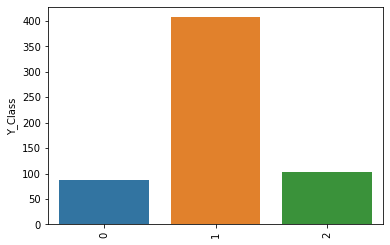

In [90]:
sns.barplot(df_train['Y_Class'].value_counts().index,df_train['Y_Class'].value_counts())
plt.xticks(rotation=90)

### 모델 평가

In [59]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [60]:
X_train.shape,X_test.shape

((598, 2877), (310, 2877))

In [75]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier


kf = KFold(random_state=30,
           n_splits=5,
           shuffle=True,
          )

param_grid_rf = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_samples_split': [0.01, 0.05, 0.1],
    'max_features': ['auto', 'sqrt'],
}
param_grid_lgb = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 6, 9, 12],
    'min_child_samples': [0.01, 0.05, 0.1],
}

In [76]:
# 모델 선언
model = RandomForestClassifier()

In [ ]:
model = LGBMClassifier()

In [77]:
# define grid_search
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid_rf, 
                           cv=kf, 
                           n_jobs=-1, 
                           verbose=2
                          )

# fit with (x_train, y_train)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=30, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 6, 9, 12],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [0.01, 0.05, 0.1],
                         'n_estimators': [100, 150, 200, 250]},
             verbose=2)

In [78]:
grid_search.best_params_

{'max_depth': 12,
 'max_features': 'auto',
 'min_samples_split': 0.01,
 'n_estimators': 150}

rf : max_depth=12,max_features='auto',min_samples_split=0.01,n_estimators=100</br>
lgbm :

In [ ]:
model_a = LGBMClassifier(max_depth=None,max_features='auto',min_samples_split=0.01,n_estimators=200)
model_a.fit(X_train_a,y_train_a)

LGBMClassifier(max_depth=None, max_features='auto', min_samples_split=0.01,
               n_estimators=200)

In [79]:
# 모델 선언
model = RandomForestClassifier(max_depth=12,max_features='auto',min_samples_split=0.01,n_estimators=150)

# 모델 훈련
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_split=0.01, n_estimators=150)

In [ ]:
# 모델 선언
model_b = RandomForestClassifier(max_depth=12,max_features='auto',min_samples_split=0.01,n_estimators=100)

# 모델 훈련
model_b.fit(X_train_na,y_train_na)

In [80]:
y_pred = model.predict(X_train)

In [81]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train,y_pred)

0.9448160535117057

In [82]:
y_pred = model.predict(X_test)

### 테스트 데이터셋

In [83]:
submit = pd.read_csv('/content/drive/MyDrive/lgaimers/sample_submission.csv')

In [84]:
submit['Y_Class'] = y_pred

In [85]:
submit.to_csv('./baseline_submission.csv', index=False)

In [86]:
submit

,PRODUCT_ID,Y_Class
0,TEST_000,1
1,TEST_001,1
2,TEST_002,1
3,TEST_003,1
4,TEST_004,1
...,...,...
305,TEST_305,1
306,TEST_306,1
307,TEST_307,1
308,TEST_308,1
